# Health Care Prediction on Diabetic Patients - Case Study 
## Context
This dataset originates from the National Institute of Diabetes and Digestive and kidney Diseases. Its primary objective is to diagnostically predict whether a patient has diabetes or not based on specific diagnostic measurements. The dataset was carefully selected, focusing on female patients aged atleast 21 years and of Pima Indian heritage.

## Problem Statement
Build a model with high accuracy to predict whether patients in the dataset have diabetes.
## Dataset Description 
The dataset includes various medical predictor variables and one target variable, "Outcome". The predictor variable encompass essential health metrics, such as the number of pregnancies, plasma glucose concentration, diastollic blood pressure, triceps skinfold thickness, insulin levels, Body Mass Index(BMI), diabetes pedigree function and age.
### Predictor Variables 
1. **Pregnancies:**
   - Number of times pregnant
2. **Glucose:**
   - Plasma Glucose concentration at 2 hours in an oral glucose tolerance test
3. **BloodPressure:**
   - Diastollic blood pressure (mm Hg)
4. **SkinThickness:**
   - Triceps Skinfold thickness (mm)
5. **Insulin:**
    - 2-Hour serum insulin (mm U/mL)
6. **BMI:**
   - Body mass index (weight in kg/ (height in m)^2)
7. **Diabetes Pedigree Function:**
   - Diabetes pedigree function
8. **Age:**
   - Age in years
### Target Variable
**Outcome**
- Class variable(0 or 1)
- 268 instances are labelled as 1 (indicating diabetes), while others are labelled as 0
This dataset provides a valuable opportunity to develop a predictive model for diabetes based on demographic and health-related features.
        

### Loading the required Library Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%pip install seaborn
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report, confusion_matrix, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Note: you may need to restart the kernel to use updated packages.


### Reading and exploring the Health Care Dataset

In [5]:
data=pd.read_csv('train.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Checking the number of rows and columns of the dataset
data.shape

(768, 9)

In [7]:
# Dataset Information Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Summary Statistics for the Diabetes Dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Preprocessing: Treating the Missing Values

In this datasets 0 represents the null values, and hence we will replace 0 by mean of their feature (variable)
columns.

In [8]:
#Identifying the mean of the features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [9]:
#Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [10]:
# Finding the null value percentage
selected_columns=['Glucose','BloodPressure','SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100
# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print (null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


### Inferences from Null Value Percentage Analysis
The analysis of null value percentages in the dataset reveals the following insights:
1. **Glucose:**
    -  Approximately 0.65% of the data points in the "Glucose" column are represented as null values.
2. **Blood Pressure:**
   - The "Blood Pressure" column has a null value percentage of approximately 4.56%.
3. **Skin Thickness:**
   - A significant portion of the "Skin Thickness" column, around 29.56%, contains null values.
4. **Insulin:**
   - The "Insulin" column exhibits a higher null value percentage with approximately 48.70% of the data points being null.

These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin, 
to ensure the integrity of the dataset for subsequent analysis or modeling.

In [11]:
#Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0],[data['Glucose' ].mean()])
data['BloodPressure' ]=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [12]:
#Checking the null value percentage of the treated columns
null_percentage_treated =(data[selected_columns] == 0).mean() * 100
# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment: ")
print (null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment: 
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


### Inference from Null Value Treatment
These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "Skin Thickness" and "Insulin," 
to ensure the integrity of the dataset for subsequent analyses or modeling.

In [13]:
#Replacing the null values with the mean
data['Glucose']=data['Glucose'].replace([0], [data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data['BMI'] = data['BMI'].replace([0],[data['BMI'].mean()])

In [16]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean()* 100
# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print (null_percentage_treated) 

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


### Detecting Outliers and Treatment 

In [17]:
selected_columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [18]:
columns=data[selected_columns]

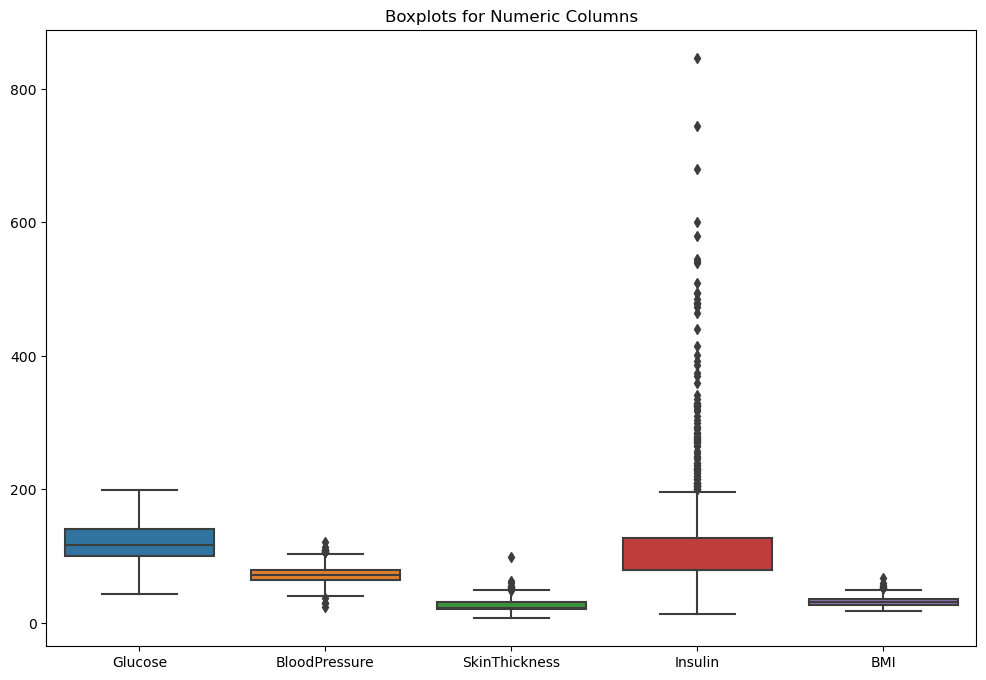

In [19]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8)) 
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_23932\3787483323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_23932\3787483323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_2

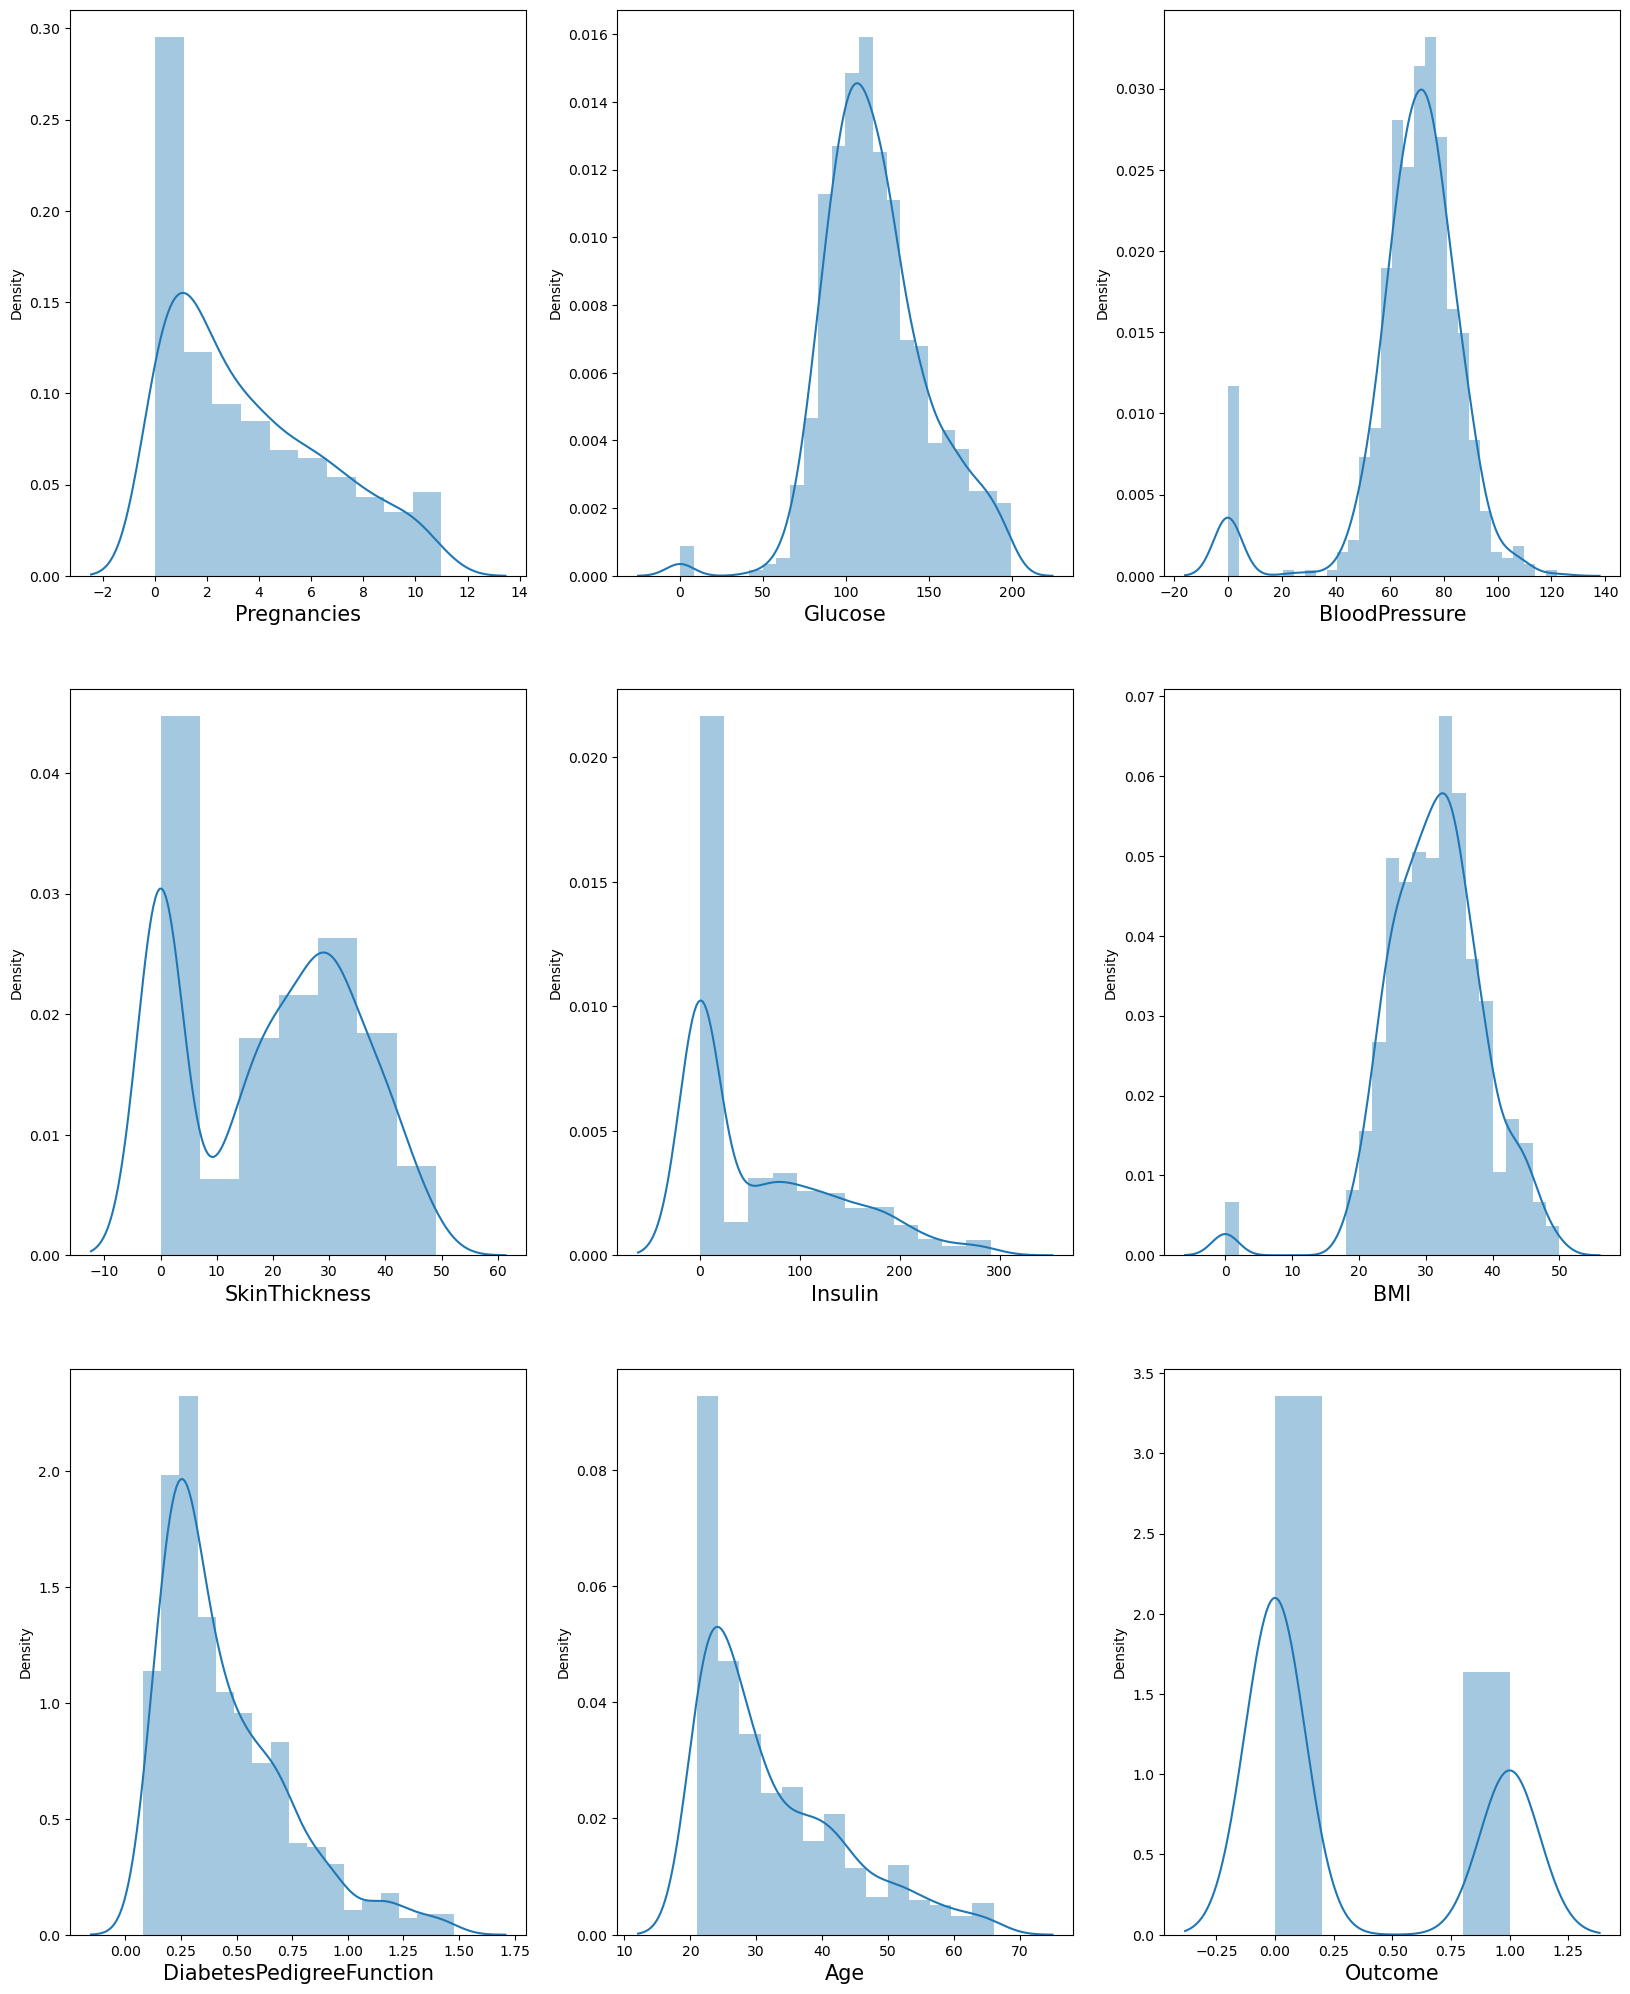

In [48]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

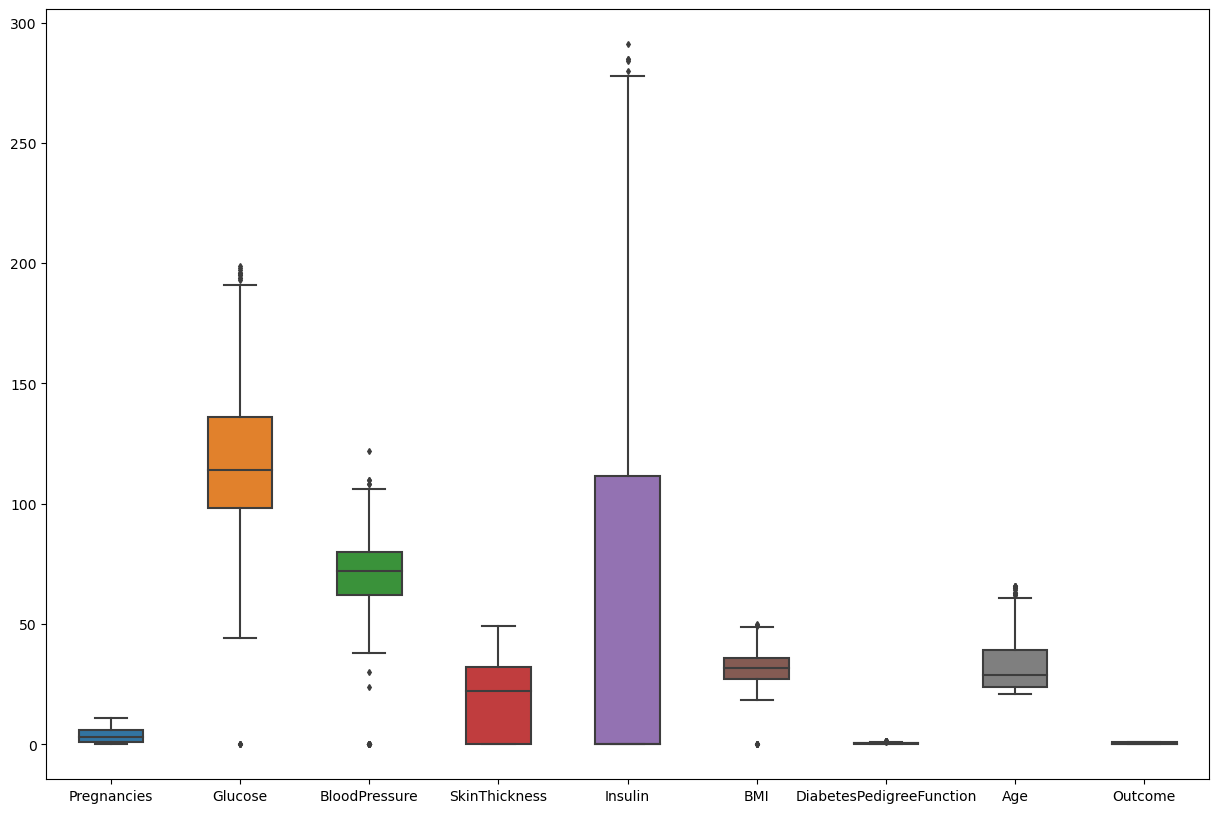

In [49]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [50]:
outlier = data['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

C:\Users\acer\AppData\Local\Temp\ipykernel_23932\3787483323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_23932\3787483323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_2

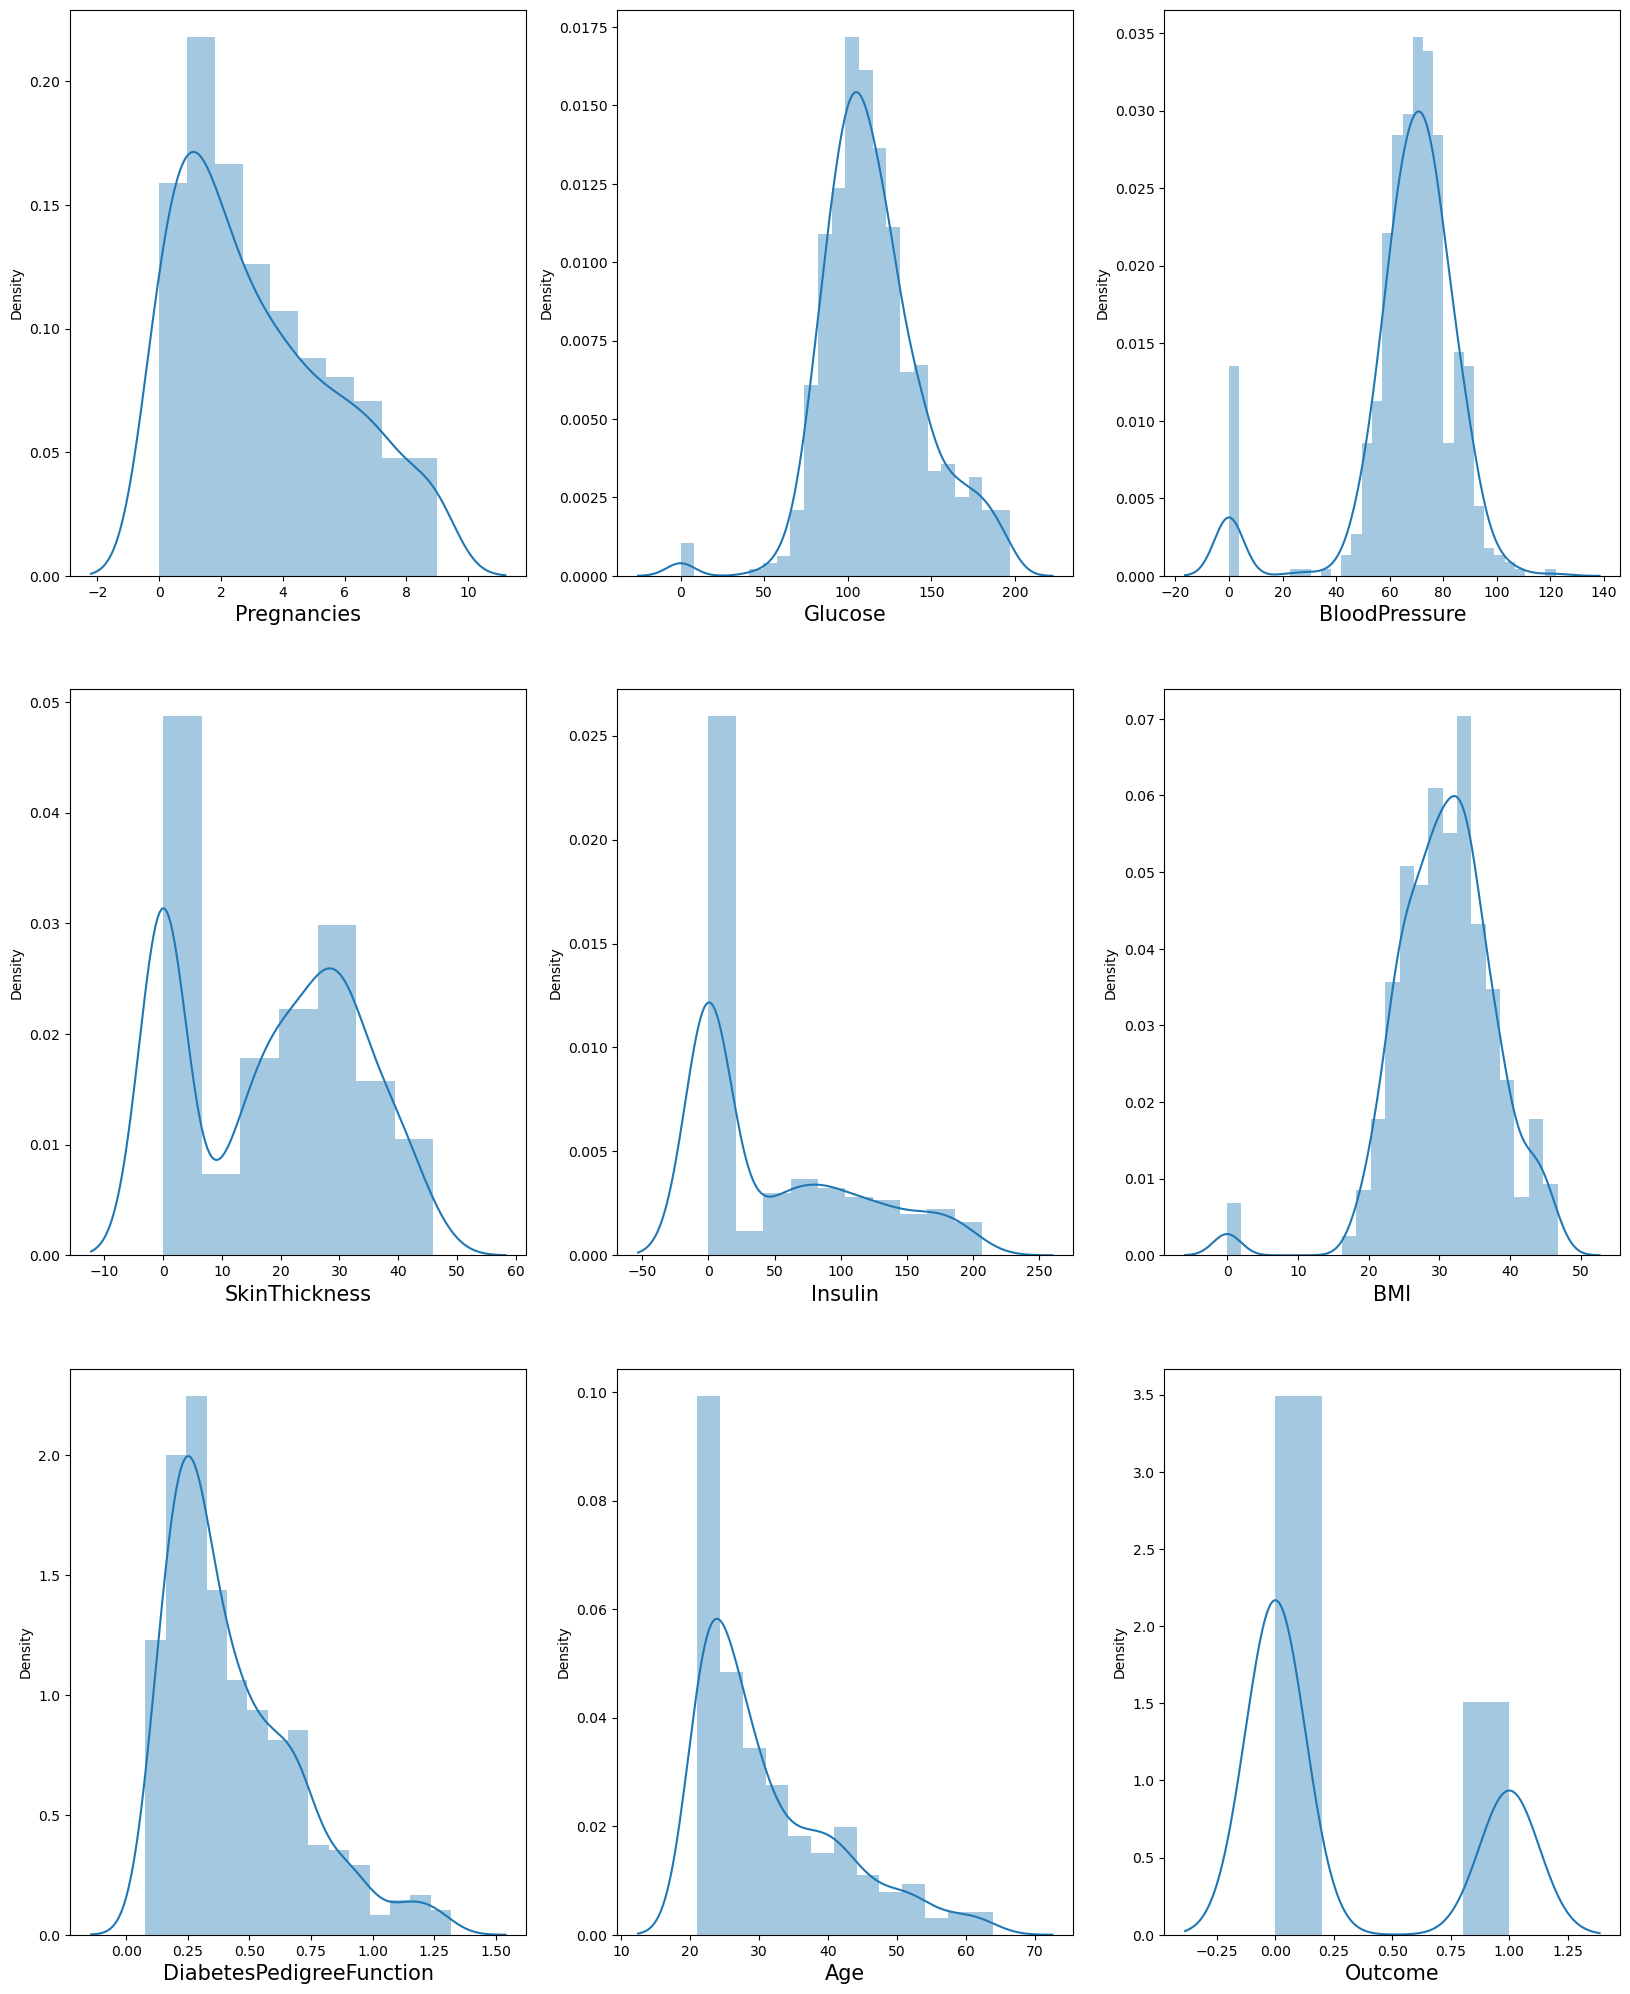

In [51]:
# again checking the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

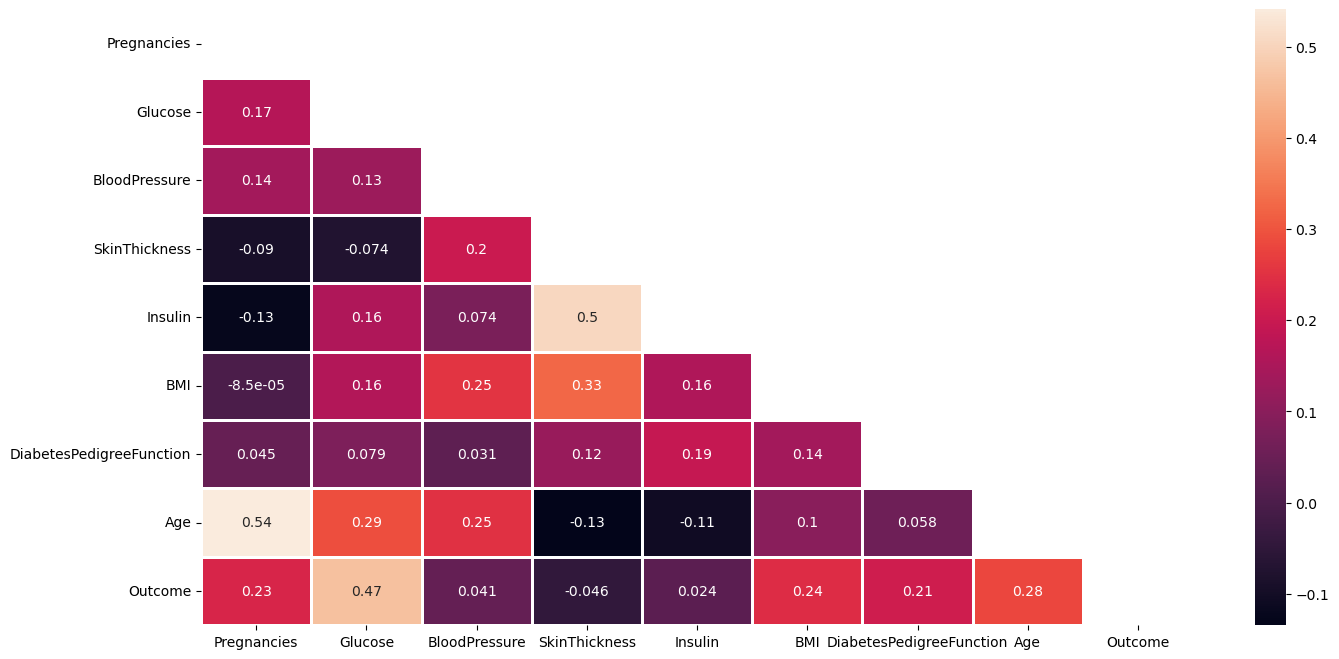

In [52]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
# Finding the outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (03)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile (0.75)
    # Calculate the interquartile range (IQR)
    IQR=Q3-Q1
    # Define the Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3+1.5 * IQR
    # Find outliers
    outliers = data[ (data[column_name]<lower_bound)|(data[column_name]>upper_bound)]
    # Count the number of outliers
    count_outliers = len(outliers)
    return count_outliers
    # Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print (f"Number of outliers in the '{column_name}' column:{outlier_count}")

Number of outliers in the 'Glucose' column:0
Number of outliers in the 'BloodPressure' column:14
Number of outliers in the 'SkinThickness' column:12
Number of outliers in the 'Insulin' column:89
Number of outliers in the 'BMI' column:8


## Boxplot Analysis for Numerical Columns
The boxplot illustrates the distribution of four numerical columns: Glucose, BloodPressure, SkinThickness, and Insulin. The following inferences can be drawn:
#### Glucose
- Median glucose level: ~200 mg/dL
- IQR is large, indicating considerable variability in glucose levels.
- There are no outli
#### Blood Pressure
- Median blood pressure: 72 mmHg (within the normal range).
- IQR is relatively small, suggesting more consistent blood pressure levels.
- Few outliers, none extremely high or low.
#### Skin Thickness
- Median skin thickness: ~25 mm
- IQR is small, indicating less considerable variability in skin thickness.
- Few outliers, none extremel
#### Insulin
- Median insulin level: ~79 mIU/L
- IQR is large, indicating considerable variability in insulin levels.
- More outliers, many are extremely high.
#### Overall Observations
- All columns exhibit a wide range of values, with some outliers. Insulin column has many outliers
- Median values for all columns, except the insulin column fall within the normal range.
#### Additional Inferences
- Glucose levels show more variability than blood pressure levels.
- More outliers in the insulin columns compared to blood pressure and skin thickness.
#### Possible Interpretations
Variability in glucose levels may be influenced by factors like diet, exercise, and stress.
- Outliers in the Insulin column may also be associated with underlying medical conditions or physiological factors. Elevated insulin levels could be indicative of
conditions such as insulin resistance or diabetes. Additionally, factors such as dietary habits, genetic predisposition, or specific medical treatments may contribute to
higher insulin levels. gationFurther investi and domain expertise are necessary to understand the potential health implications of these outliers in the 
I### nsulin column.
It is essential to note that these inferences are based on a single boxplot, and further information is needed to draw definitive conclusions.y high.ers

### Outlier Treatment

In [22]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [23]:
data_cleared_iqr = data[~((data < (Q1 -1.5 * IQR))|(data > (Q3 + 1.5 * IQR))).any (axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [24]:
data_cleared_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


### Inferences from Outlier Removal using IQR Method:
1. **Data Size Reduction:**
    -  After removing outliers using the interquartile range (IQR) method, the dataset has been reduced from 768 to 688 rows.
2. **Outliers Identifer:**
    - Outliers were detected and removed across various columns, particularly impacting features like Glucose, Blood
Pressure, Skin Thickness, Insulin, BMI, andAge.
3. **Increased Data Robustness:**
   - The IQR-based outlier removal contributes to a more robust dataset, potentially improving the reliability of statistical analysis and modelling.
4. **Preserved Features:**
   - The operation was applied to 9 columns, including predictors like Glucose and SkinThickness, as well as the target variable outcome.
5. **Consideration for Domain Knowledge:**
   - The decision to remove outliers should be made with consideration for domain knowledge, as outliers may contain valuable information or indicate specific health conditions.
### Final Data Statistics:
- Dataset size after removal: 688 rows
- Original Dataset size: 788 rows
:

In [25]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

In [26]:
type(col)

pandas.core.frame.DataFrame

In [27]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479


In [28]:
col.shape

(688, 4)

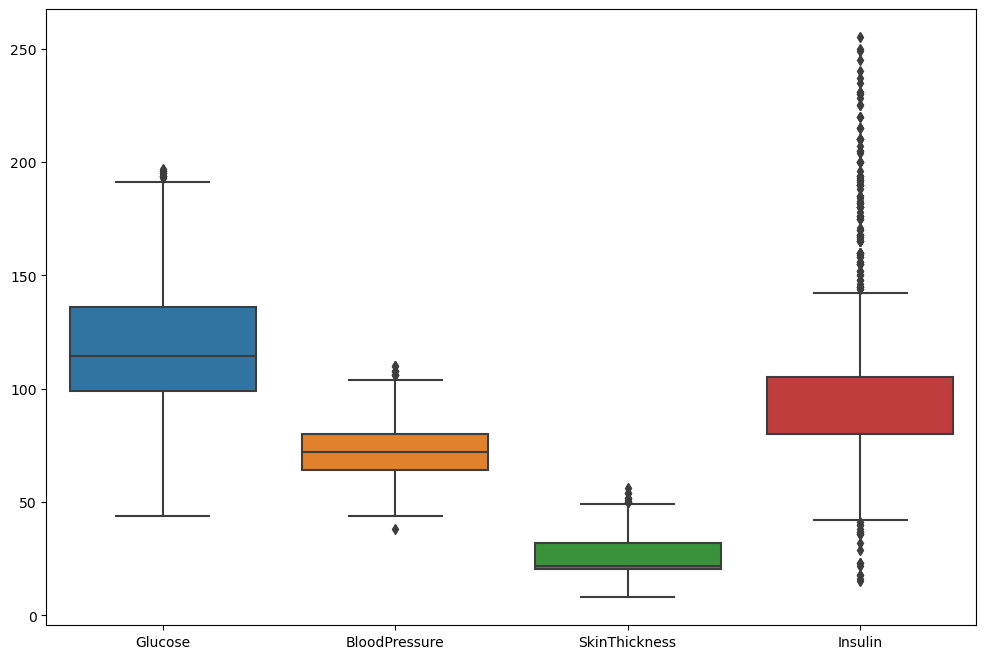

In [29]:
# Checking the outliers after treatment using box plot 
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

##### It can be observed that the outliers have been significantly reduced

## EDA - Univariate analysis for each feature
### Visually exploring variables using histograms

In [30]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


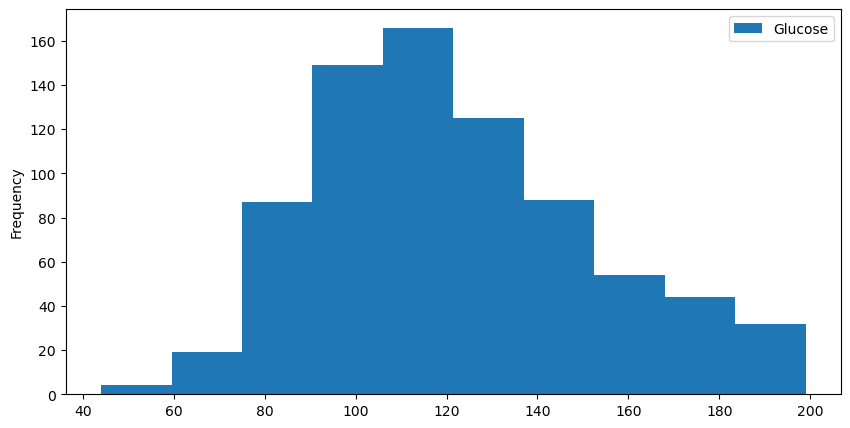

In [31]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

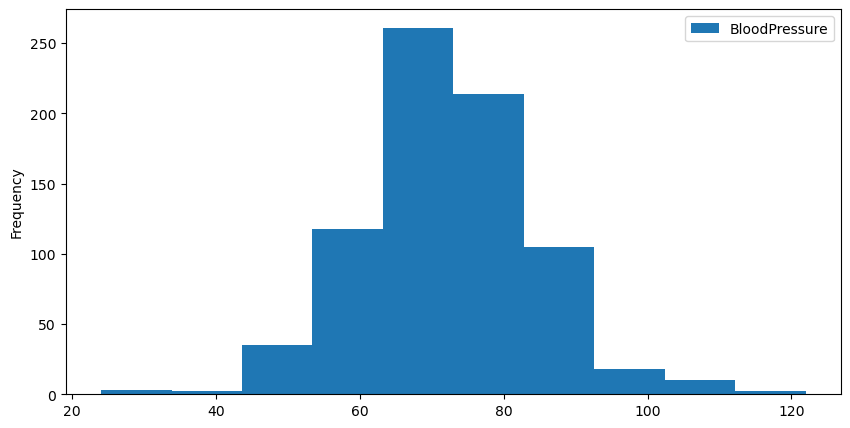

In [32]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

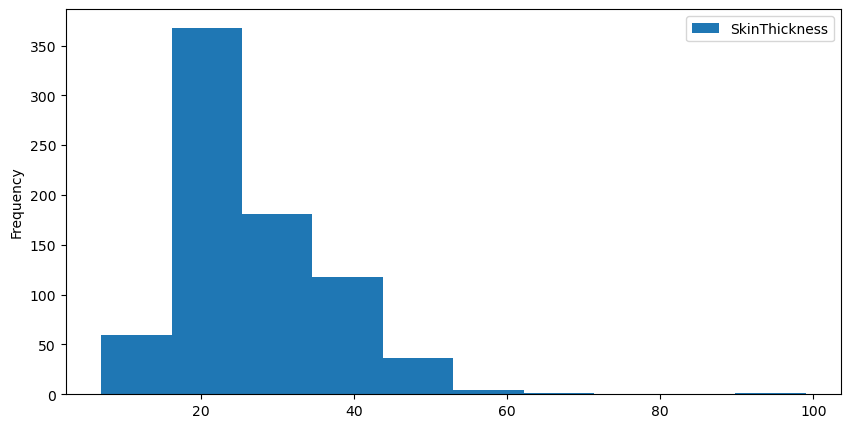

In [33]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

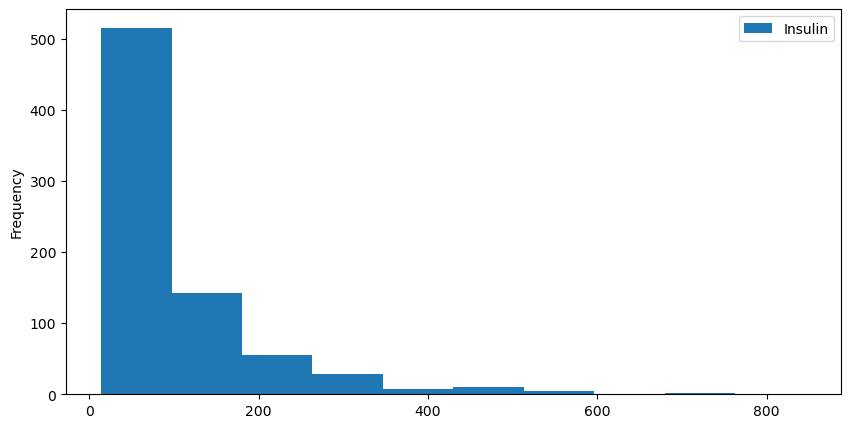

In [34]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

### Violin plot for the selected features

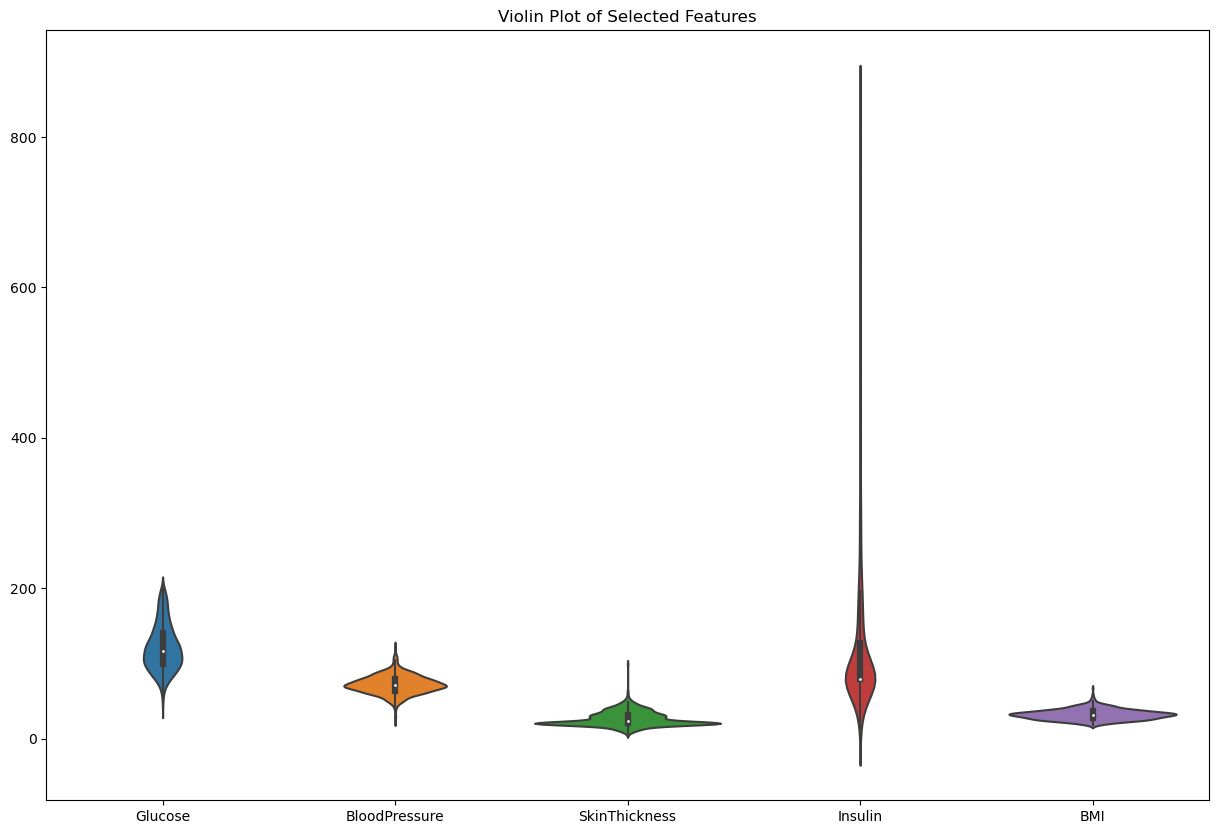

In [35]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

#### The violin plot shows the distribution of five numerical features: Glucose, BloodPressure, SkinThickness, Insulin and BMI. The violin shape represnts the probability density function (PDF) of each feature, and the box plot embedded within each violin plot shows the median, interquartile range (IQR), and outliers.

# Kernel Density Estimation(KDE) plot for the selected feature

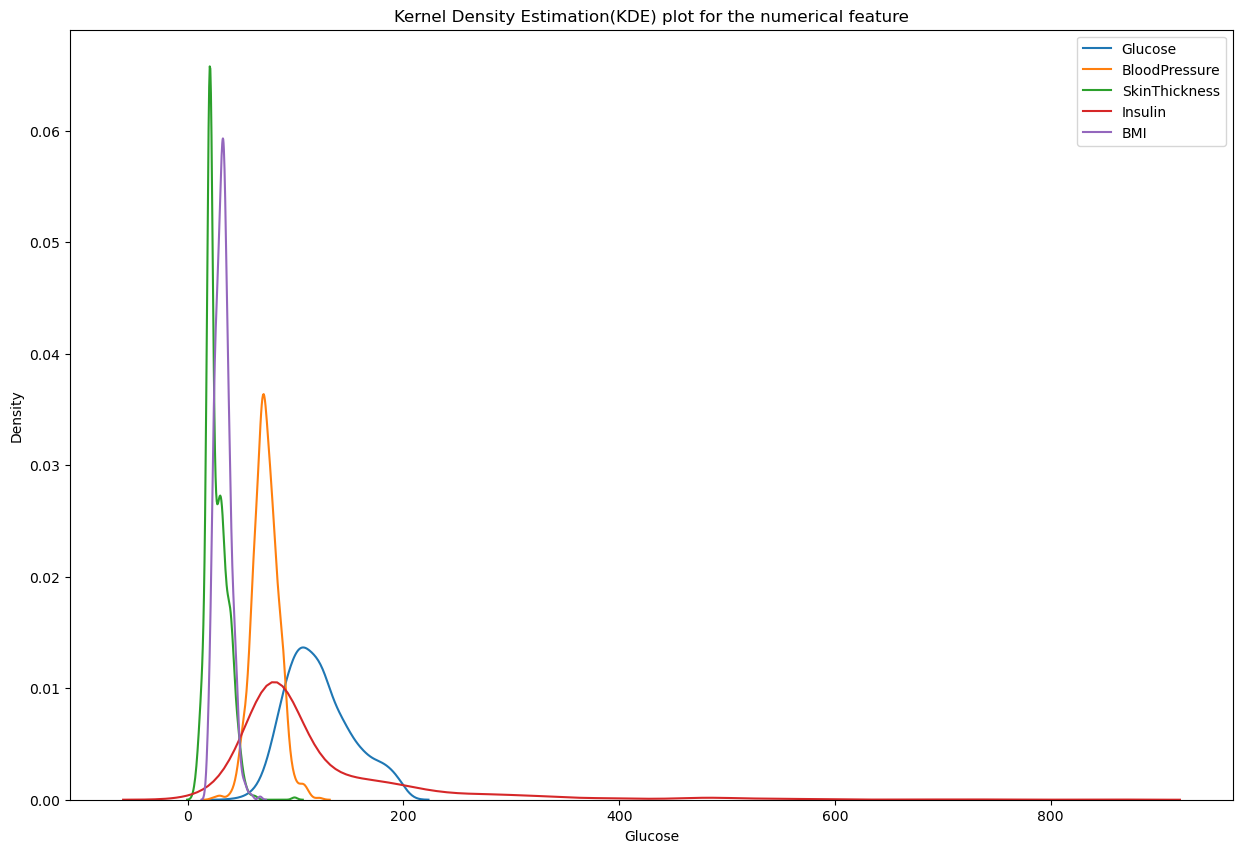

In [36]:
plt.figure(figsize=(15,10))
for column in selected_columns:
    sns.kdeplot(data[column],label=column)
plt.title("Kernel Density Estimation(KDE) plot for the numerical feature")
plt.legend()
plt.show()

#### The image shows a Kernel Density Estimation (KDE) plot of five numerical features: Glucose, BloodPressure, SkinThickness, Insulin and BMI. KDE is a non-parametric method for estimating the probability density function (PDF) of a random variable. The KDE plot shows the estimated PDF of each feature, which can be visualise the distribution of the data.

### Creating a count(frequency) plot describing the data types and count of variables

In [37]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


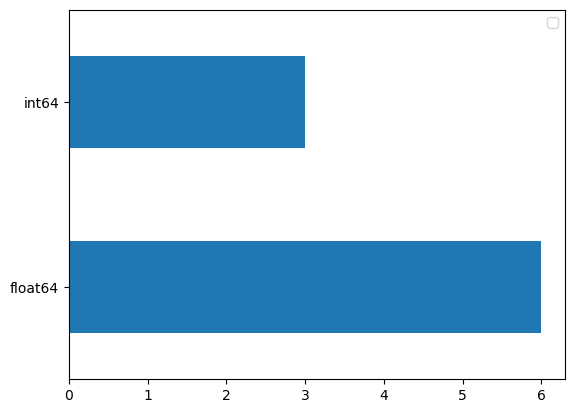

In [39]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

#### It can be observed that there are three features of integer data type and six features of float data type

### Check the balance of the data by plotting the count of outcomes by their values. Describe your findings and plan future course of action.

In [40]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

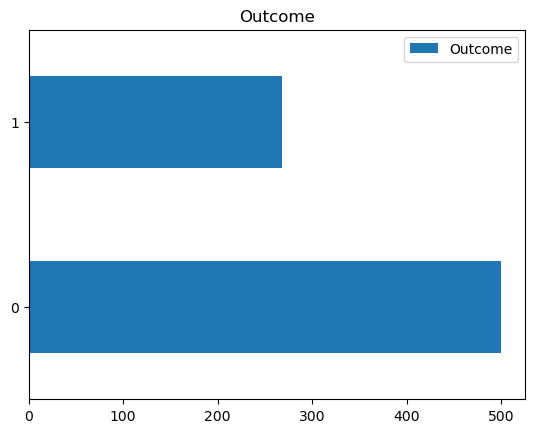

In [41]:
data['Outcome'].value_counts().plot(kind='barh')
plt.legend()
plt.title('Outcome')
plt.show()

In [42]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Inferences from Outcome Distribution:
1. **Class Imbalance:**
   - The dataset exhibits class imbalance in the 'Outcome' variable.
   - Class 0(No Diabetes) has 500 instances.
   - Class 1(Diabetes) has 268 instances.
2. **Potential impact on Modelling:**
    - Class imbalances may affect the performance of machine learning models, particularly for binary classification tasks.
    - Addressing class imabalance through techniques like resampling or using appropriate evaluation metrics may be necessary.
3. **Consideration for Predictive Models:**
   - Models may need to be evaluated and tuned considering the imbalanced distribution to avoid biased predictions toward the majority class.

In [43]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

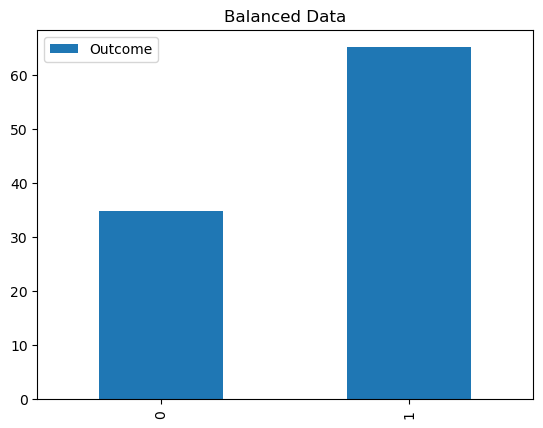

In [44]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced Data')
plt.show()

### Findings and future course of action
- We can see its a Imbalance dataset. This shows that a dataset is biased towards a class 0 in the dataset. If the dataset is biased towards one class, an algorithm trained on the same data will be biased towards the same class, so first we have to balance it.
- We can use Resampling or SMOTE to balance a dataset.

## Bi-variate Analysis
### Creating scatter charts between the pair of variables to understand the relationships.

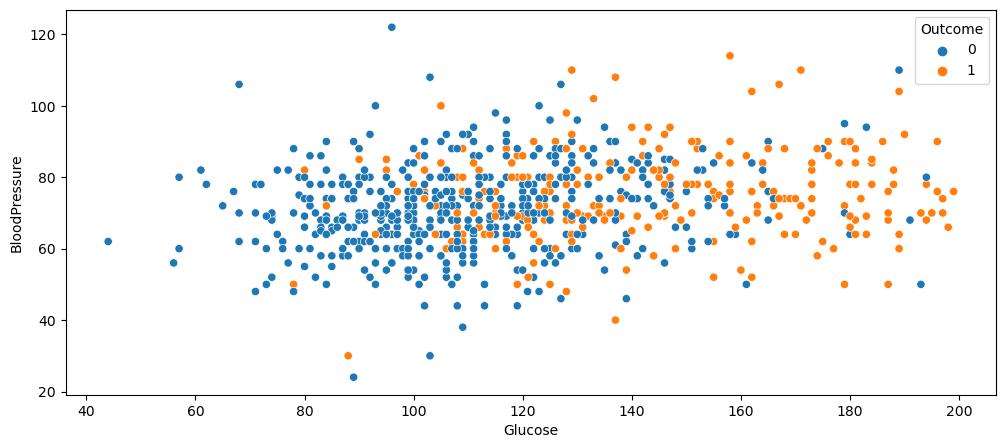

In [45]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

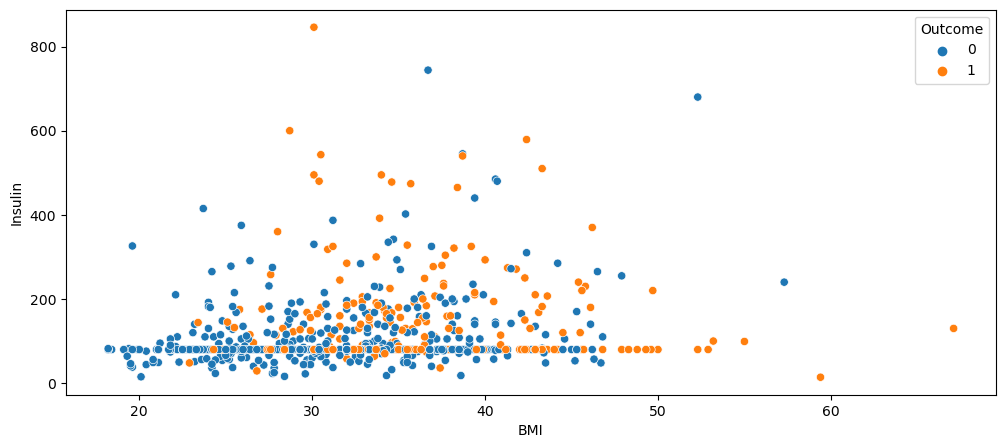

In [46]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

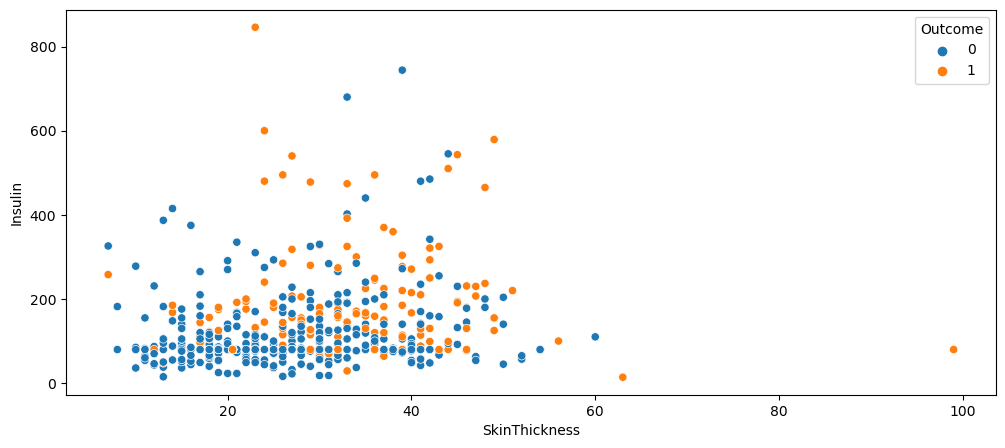

In [47]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

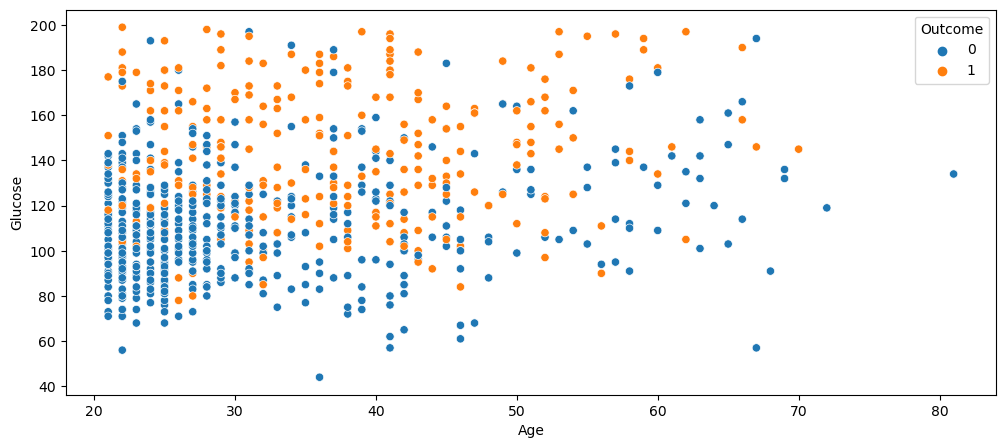

In [48]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

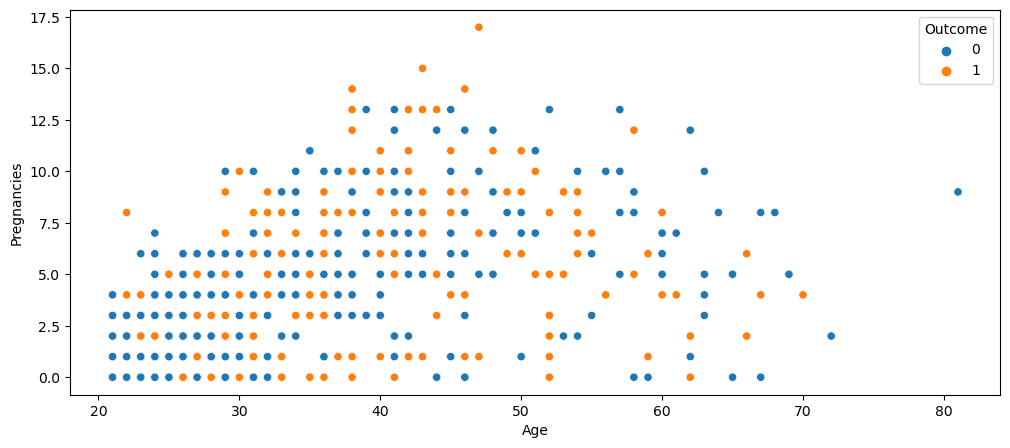

In [49]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Pregnancies',hue='Outcome',data=data)
plt.show()

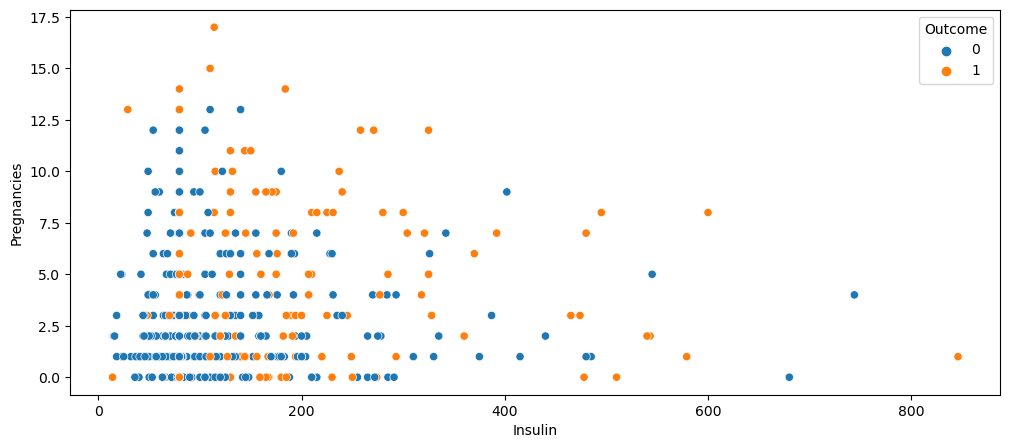

In [50]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Insulin',y='Pregnancies',hue='Outcome',data=data)
plt.show()

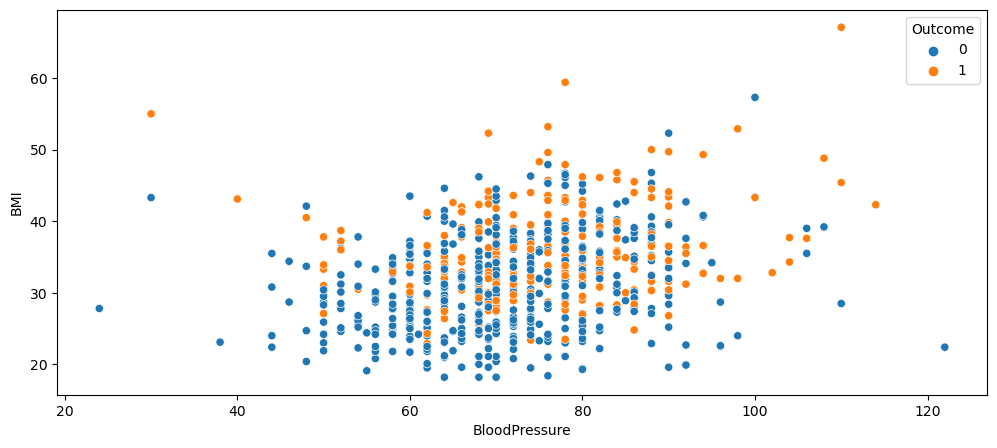

In [51]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BloodPressure',y='BMI',hue='Outcome',data=data)
plt.show()

- We can see Pregancies has highest relation with Age feature.
- Also Outcome has maximum relation with  Glucose and minimum with BloodPressure than the other features
- We can see from scatter plot that there is outliers present in the data
- Because of Outliers, our data is skewed to left or right side, which is not acceptable
- If we want to train a model, this poses a problem
- Therefore, for better visualization and outlier detection, we can use sns.boxplot and remove outliers from the dataset

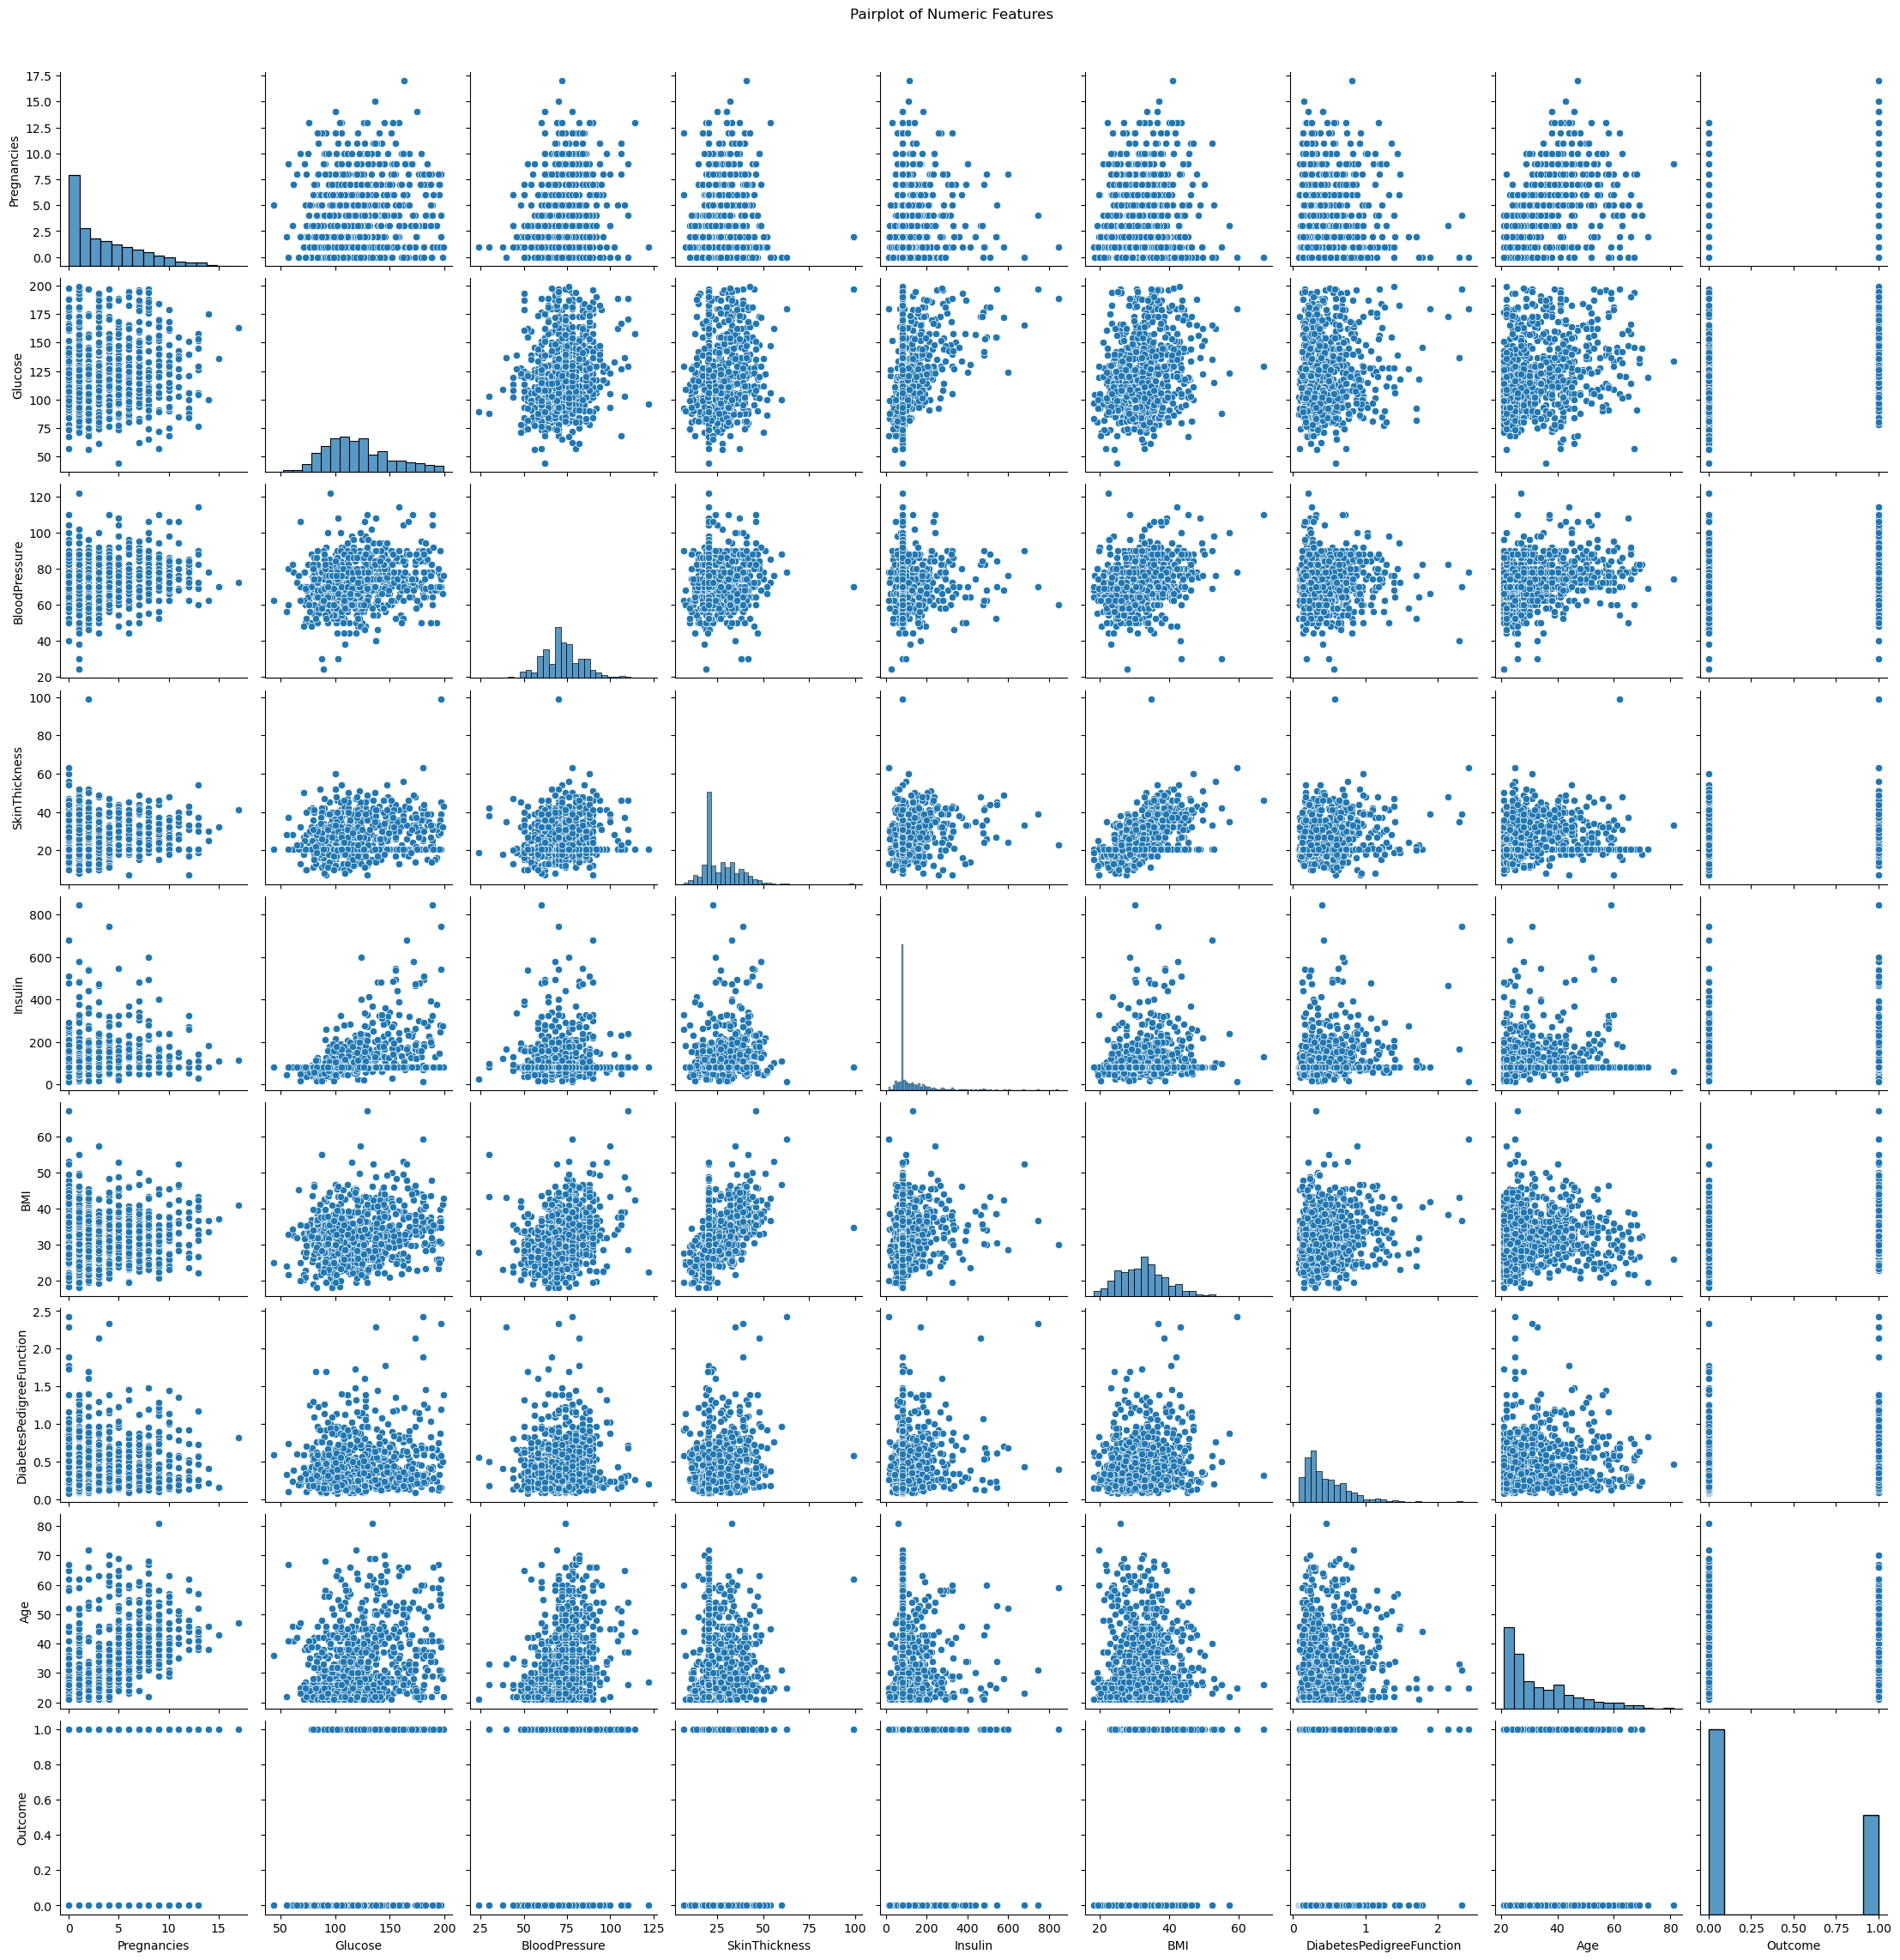

In [52]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features",y=1.02)
plt.show()

### Multi Variate Analysis
#### Perform correlation analysis. Visually explore it using a heat map

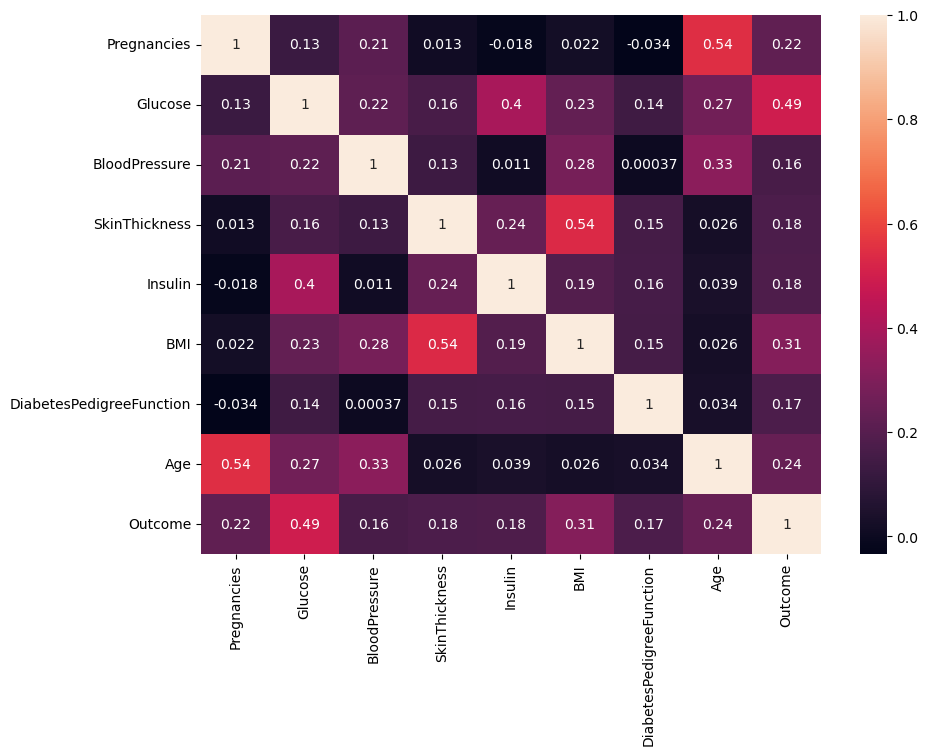

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### We can see Outcome has maximum relation with Glucose and minimum with Blood Pressure than the other features.

### Data Modelling:
1. Device strategies for model building. It is important to decide the right validation framework. Express your thought process.
#### Strategies for Model Building :-
1. **Descriptive Analysis :**
    - Identify ID, Input and Target features
    - Identify categorical and numerical features
    - Identify columns with missing values
2. **Data Treatment (Missing values treatment) :**
    - Detecting outliers & removing them.
    - Imputing mean, mode or median value at a place of missing value as per dataset
3. **Feature Extraction / Feature Engineering :**
    - we will remove noisy features from data
    - By the help of correlation / heatmap / differnt types of feature selection techniques.
4. **Data is imbalanced :**
     - For balancing the data we wil use SMOTE over sampling techinque.
5. **Building a model :**
    - select a best algorithms for model
6. **Train a model**
7. **Evaluation**
    - check a accuracy & mean squared error of model
8. **Hyper Parameter Tunning :**
    - for decrese in RMSE check a best parameters for model.
9. **Create a clasification report.**

### Feature Selection

In [56]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [58]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Data Preparation for Modeling
x=data.drop(['Outcome'], axis=1)
y=data.Outcome

In [13]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
type(y)

pandas.core.series.Series

In [15]:
# Finding the Correlation of every feature with the Outcome (Target Variable)
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [16]:
bestfeatures = SelectKBest (score_func=chi2, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame (x.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] #naming the dataframe columns
print (featureScores.nlargest (8, 'Score')) #print 10 best features

                      Specs        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


In [17]:
type(fit)

sklearn.feature_selection._univariate_selection.SelectKBest

In [18]:
fit.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

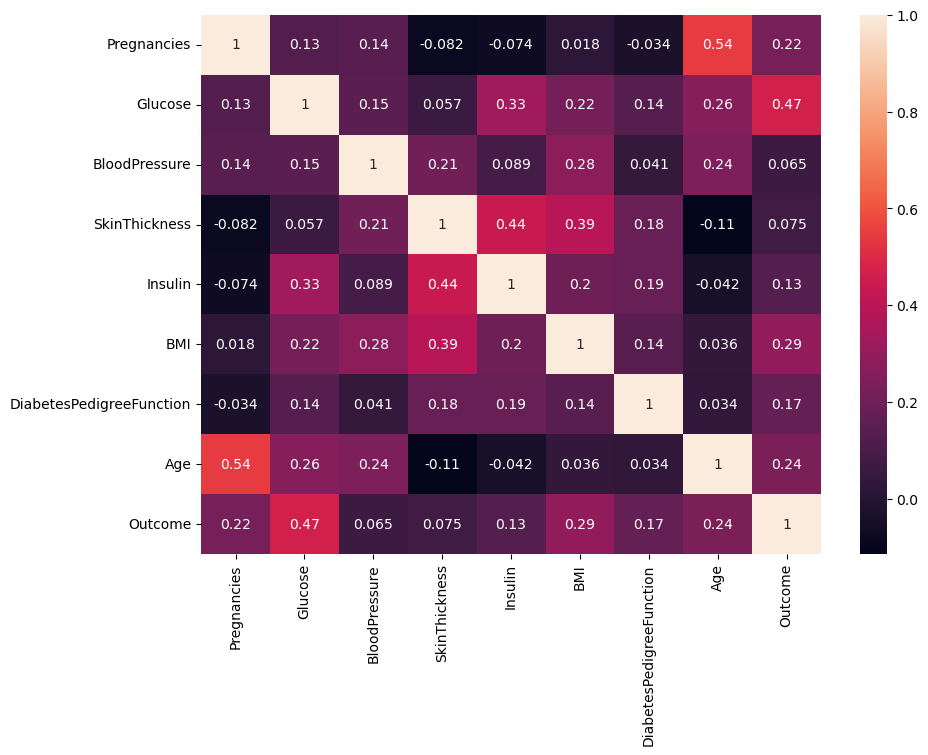

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

## SMOTE to address the Class Imbalance 
### Train  a model

In [53]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [56]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

lr_train_acc = accuracy_score(y_train, lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.7638888888888888
Test Accuracy of Logistic Regression Model is 0.8020833333333334


In [59]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [60]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [61]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=63)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_trainy_res == 0)))


Before OverSampling, counts of label '1': 206
Before OverSampling, counts of label '0': 370 



ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\acer\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

### K Neighbors Classifier (KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8055555555555556
Test Accuracy of KNN Model is 0.8020833333333334


In [64]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[114,  16],
       [ 22,  40]], dtype=int64)

In [65]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192



### Support Vector Classifier 

In [66]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svc_train_acc = accuracy_score(y_train, svc.predict(x_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8246527777777778
Test Accuracy of SVC Model is 0.7760416666666666


In [67]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[117,  13],
       [ 30,  32]], dtype=int64)

In [68]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192



### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")


Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.7239583333333334


In [70]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[103,  27],
       [ 26,  36]], dtype=int64)

In [71]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       130
           1       0.57      0.58      0.58        62

    accuracy                           0.72       192
   macro avg       0.68      0.69      0.69       192
weighted avg       0.73      0.72      0.72       192



In [73]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [76]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 3}
0.743088455772114


In [77]:
dtc = grid_search.best_estimator_

y_pred = dtc.predict(x_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.8506944444444444
Test Accuracy of Decesion Tree Model is 0.765625


In [78]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[113,  17],
       [ 28,  34]], dtype=int64)

In [79]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       130
           1       0.67      0.55      0.60        62

    accuracy                           0.77       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.8020833333333334
Test Accuracy of Random Forest Model is 0.7760416666666666


In [81]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[120,  10],
       [ 33,  29]], dtype=int64)

In [82]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       130
           1       0.74      0.47      0.57        62

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192



## Boosting
### Ada Boost Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=7,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=3)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [84]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.001, 'n_estimators': 120}
0.7465817091454273


In [86]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.001, n_estimators = 120)
ada.fit(x_train, y_train)

ada_train_acc = accuracy_score(y_train, ada.predict(x_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training Accuracy of Ada Boost Model is 0.8506944444444444
Test Accuracy of Ada Boost Model is 0.7760416666666666


In [87]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[120,  10],
       [ 33,  29]], dtype=int64)

In [88]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       130
           1       0.74      0.47      0.57        62

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192



### Gradient Boosting Classifier

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\acer\anaconda3\Lib\site-packages\skle

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [91]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 180}
0.7500449775112443


In [95]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

gb_train_acc = accuracy_score(y_train, gb.predict(x_train))
gb_test_acc = accuracy_score(y_test, y_pred)
    
print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9496527777777778
Test Accuracy of Gradient Boosting Classifier Model is 0.7916666666666666


In [96]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[114,  16],
       [ 24,  38]], dtype=int64)

In [97]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       130
           1       0.70      0.61      0.66        62

    accuracy                           0.79       192
   macro avg       0.76      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



### Stochastic Gradient Boosting (SGB)

In [100]:
sgbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'exponential',
                                  n_estimators = 100)

sgbc.fit(x_train, y_train)

y_pred = sgbc.predict(x_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(x_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

Training Accuracy of SGB Model is 0.921875
Test Accuracy of SGB Model is 0.8125


In [101]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[115,  15],
       [ 21,  41]], dtype=int64)

In [102]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       130
           1       0.73      0.66      0.69        62

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.81      0.81      0.81       192



### Stacking

In [105]:
# let's divide our dataset into training set and holdout set by 50% 

from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(x, y, test_size = 0.5, random_state = 355)

In [106]:
# let's split the training set again into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [108]:
# using Logistic Regression and SVM algorithm as base models.
# Let's fit both of the models first on the X_train and y_train data.

lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [113]:
#Let's get the predictions of all the base models on the validation set val_train.
predict_val1 = lr.predict(val_train)
predict_val2 = svm.predict(val_train)

In [114]:
#Let's stack the prediction values for validation set together as 'predict_val
predict_val = np.column_stack((predict_val1, predict_val2))

In [116]:
predict_test1 = lr.predict(x_test)
predict_test2 = svm.predict(x_test)

In [117]:
#Let's stack the prediction values for validation set together as 'predict_set'
predict_test = np.column_stack((predict_test1, predict_test2))

Let's use the Stacked data 'predict_val' and val_test as the input feature for meta_model i.e. randomforest classifier.

In [118]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

Let's check the accuracy of our meta_model using predict_test and y_test.

In [119]:
stacking_acc = accuracy_score(y_test, rand_clf.predict(predict_test))
print(stacking_acc)

0.7662337662337663


In [120]:
# confusion matrix

confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[44,  6],
       [12, 15]], dtype=int64)

In [121]:
# classification report

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        50
           1       0.71      0.56      0.63        27

    accuracy                           0.77        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.76      0.77      0.76        77



### Base Models

In [33]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.773479 (0.038034)
KNN: 0.721377 (0.044168)
CART: 0.705622 (0.068080)
RF: 0.764303 (0.040179)
SVM: 0.651059 (0.003418)
XGB: 0.761705 (0.054089)


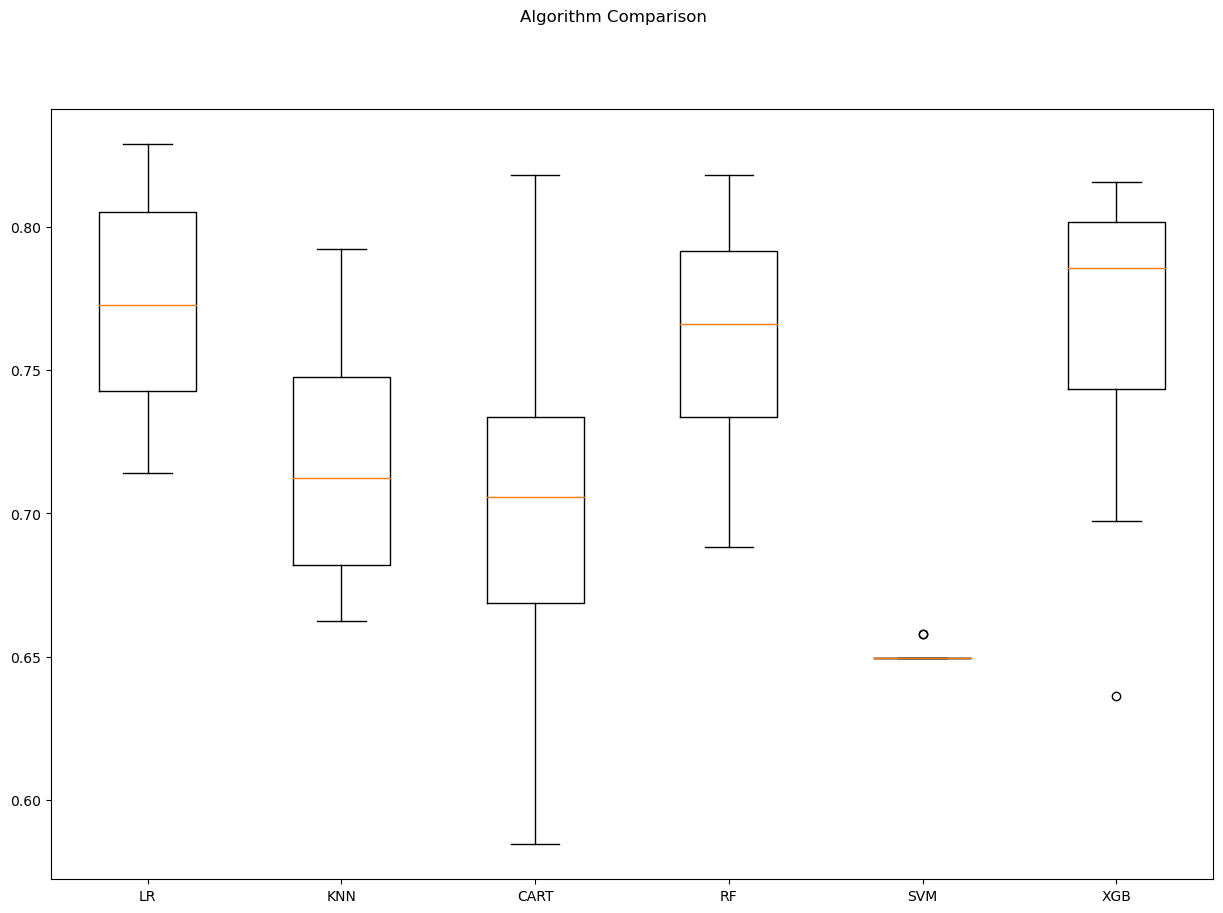

In [34]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, x, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Model Tuning

In [35]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [36]:
rf_model = RandomForestClassifier(random_state = 12345)

In [37]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(x, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [38]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

**Final Model Installation**

In [39]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [40]:
rf_tuned = rf_tuned.fit(x,y)

In [41]:
cross_val_score(rf_tuned, x, y, cv = 10).mean()

0.7656015037593984

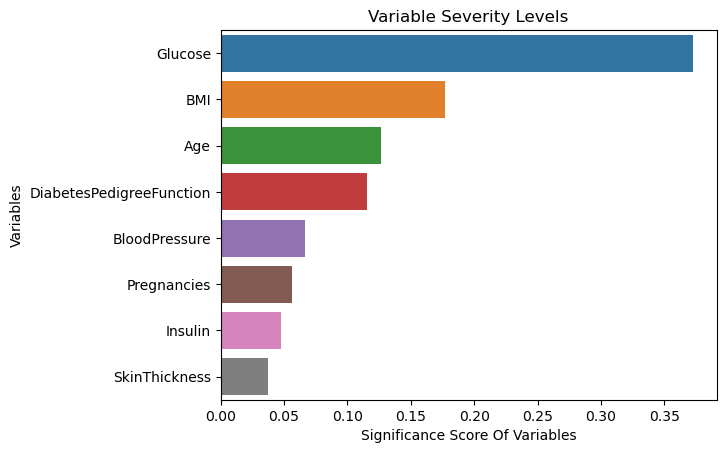

In [42]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [123]:
#Accuracy score increases a lot after use of stacking.
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'SGB', 'Stacking']
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgbc_test_acc, stacking_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,SGB,0.812500
0,Logistic Regression,0.802083
1,KNN,0.802083
6,Gradient Boosting,0.791667
2,SVC,0.776042
4,Random Forest,0.776042
5,Ada Boost,0.776042
8,Stacking,0.766234
3,Decision Tree,0.765625


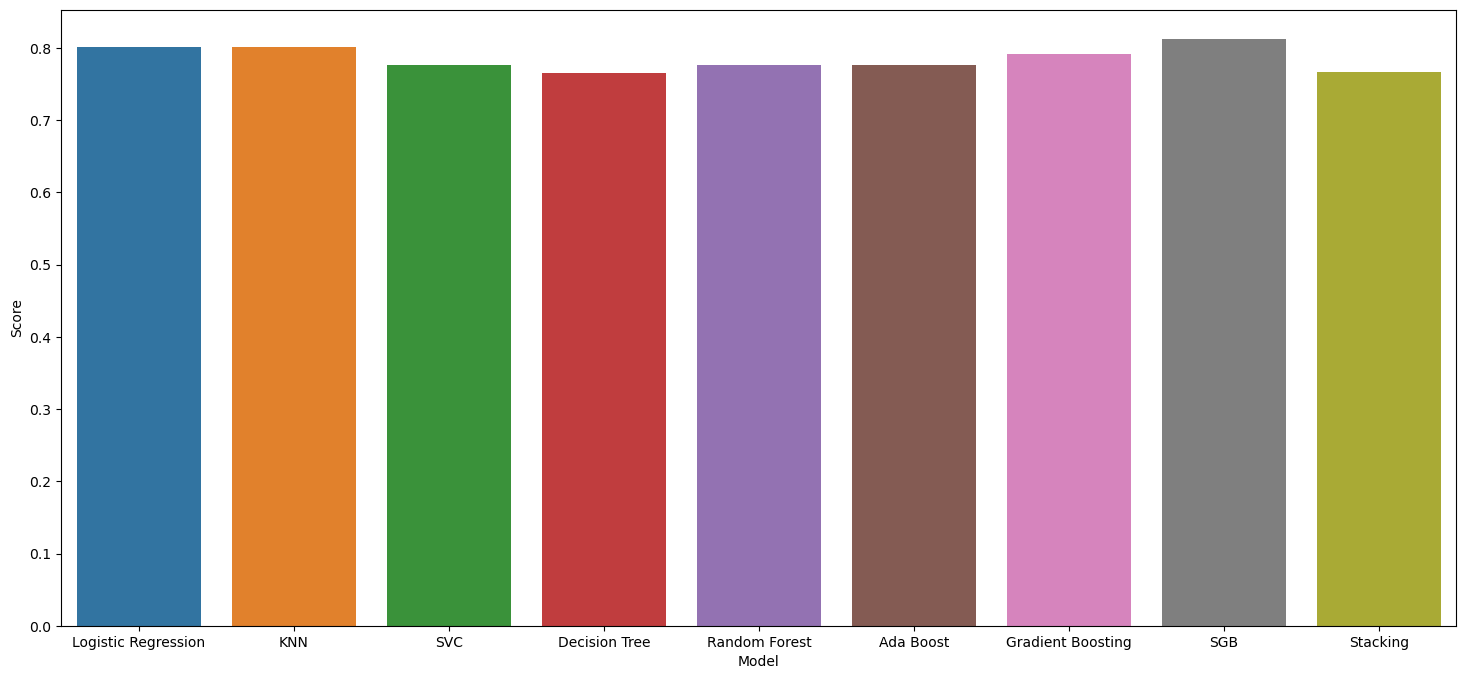

In [124]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()